# Table of Contents

1. [Introduction](#introduction)
   - [Data description](#data-description)
   - [Importing libraries](#import-libraries)
2. [Initial Data Exploration](#init-data-explore)
   - [Data loading](#data-loading)
   - [Dataset info](#dataset-info)
3. [Data Preparation](#data-preparation)
   - [Cleaning](#cleaning)
   - [Feature Engineering](#feature-engineering)
5. [Exploratory Data Analysis](#exploratory-data-analysis)
   - [Visualizations](#visualizations)
   - [Insights](#insi6hts)
6. [Model Training](#model-training)
   - [Algorithm Selection](#algorithm-selection)
   - [Parameter Tuning](#parameter-tu7ing)
7. [Results](#results)
   - [Evaluation Metrics](#evaluation-metrics)
   - [Comparison](#comparison)

# Introduction
<a id="introduction"></a>

## Dataset Description
<a id="data-description"></a>

1. **ID:** An identifier for each record in the dataset.
2. **Customer_ID:** Identifier for individual customers.
3. **Month:** The month associated with the data entry.
4. **Name:** Customer's name.
5. **Age:** Customer's age.
6. **SSN:** Social Security Number or some other form of identification.
7. **Occupation:** Customer's occupation or job title.
8. **Annual_Income:** Customer's annual income.
9. **Monthly_Inhand_Salary:** The amount of money the customer receives as salary on a monthly basis.
10. **Num_Bank_Accounts:** Number of bank accounts the customer has.
11. **Num_Credit_Card:** Number of credit cards the customer possesses.
12. **Interest_Rate:** The interest rate associated with some financial aspect (e.g., loans or credit cards).
13. **Num_of_Loan:** Number of loans the customer has.
14. **Type_of_Loan:** The type of loan(s) the customer has (e.g., mortgage, personal loan, etc.).
15. **Delay_from_due_date:** Delay in payments from the due date.
16. **Num_of_Delayed_Payment:** Number of delayed payments.
17. **Changed_Credit_Limit:** Indicates if the customer has changed their credit limit.
18. **Num_Credit_Inquiries:** Number of credit inquiries made by the customer.
19. **Credit_Mix:** The mix of different types of credit accounts (e.g., credit cards, loans).
20. **Outstanding_Debt:** The amount of outstanding debt.
21. **Credit_Utilization_Ratio:** The ratio of credit used to the total credit limit.
22. **Credit_History_Age:** The age of the customer's credit history.
23. **Payment_of_Min_Amount:** Payment behavior regarding minimum required payments.
24. **Total_EMI_per_month:** Total Equated Monthly Installment (EMI) payments made by the customer.
25. **Amount_invested_monthly:** The amount the customer invests on a monthly basis.
26. **Payment_Behaviour:** Behavior related to payments, possibly indicating patterns or trends.
27. **Monthly_Balance:** The customer's monthly balance in their financial accounts.
28. **Credit_Score:** The credit score associated with the customer's creditworthiness.

## Importing libraries
<a id="import-libraries"></a>

In [1]:
import warnings, re, joblib
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, BaggingClassifier

%matplotlib inline
%load_ext autoreload
warnings.filterwarnings("ignore")

# Initial Data Exploration
<a id="init-data-explore"></a>

## Data loading
<a id="data-loading"></a>

In [2]:
data = pd.read_csv("../data/raw/train.csv" , sep = "," , encoding = 'utf-8',na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Dataset info
<a id="dataset-info"></a>

In [3]:
data.shape

(100000, 28)

In [4]:
duplicates = data.duplicated().sum()
print(f"Count of Duplicated Rows: {duplicates}")

Count of Duplicated Rows: 0


In [5]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [6]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [7]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,97909.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,10.389025,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,6.789496,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,-6.490000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,5.320000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,9.400000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,14.870000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,36.970000,2597.000000,50.000000,82331.000000


In [8]:
data.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,94428,12500,078-73-5990,8
Occupation,92938,15,Lawyer,6575
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


# Data preparation and cleaning 

## Month conversion

In [9]:
data.Month = pd.to_datetime(data.Month,format="%B").dt.month
data.Month = data.Month.astype(np.int64)
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Converting to Numeric representation

In [10]:
features_to_be_num = ['Age', 'Num_of_Loan']
for feature in features_to_be_num:
    data[feature] = data[feature].str.extract('(\d+)').astype(int)
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [11]:
features_to_be_num=['Outstanding_Debt','Annual_Income','Amount_invested_monthly','Monthly_Balance']
for feature in features_to_be_num:
    data[feature] = data[feature].str.extract(r'(\d+\.\d+)').astype(float)
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [12]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.extract('(\d+)').astype(float)

In [13]:
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,91216.000000,97123.000000
mean,4.500000,119.509700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,30.946268,10.389025,27.754251,1426.220376,32.285173,1403.118217,195.539456,402.164483
std,2.291299,684.757313,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,226.028754,6.789496,193.177339,1155.129026,5.116875,8306.041270,199.564527,213.644217
min,1.000000,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,2.750000,25.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,72.236692,269.998334
50%,4.500000,34.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,128.954538,336.472111
75%,6.250000,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,236.815814,469.652004
max,8.000000,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


In [14]:
data.dtypes

ID                           object
Customer_ID                  object
Month                         int64
Name                         object
Age                           int32
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [15]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              2877
Credit_Score                    0
dtype: int64

# Filling missing values

## Name column

In [16]:
data[data['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,NaN,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard


In [17]:
data['Name'].fillna(value=data.groupby("Customer_ID")["Name"].transform(lambda x: x.mode().iloc[0]),inplace=True)

In [18]:
data[data['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard


In [19]:
data["Name"].isnull().sum()

0

In [20]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              2877
Credit_Score                    0
dtype: int64

## SSN column

In [21]:
data["SSN"].fillna(value=data.groupby("Customer_ID")["SSN"].transform(lambda x: x.mode().iloc[0]),inplace=True)

In [22]:
data[data['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard


In [23]:
data["SSN"].isnull().sum()

0

In [24]:
data["SSN"]=data["SSN"].apply(lambda x:int("".join(x.split("-"))) if pd.notna(x) else x).astype(np.int64)

## Occupation column

In [25]:
data["Occupation"].fillna(value=data.groupby("Customer_ID")["Occupation"].transform(lambda x: x.mode().iloc[0]),inplace=True)

In [26]:
data[data["Customer_ID"]=="CUS_0x21b1"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,1,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,2,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,0x1610,CUS_0x21b1,3,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,NaN,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
11,0x1611,CUS_0x21b1,4,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
12,0x1612,CUS_0x21b1,5,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
13,0x1613,CUS_0x21b1,6,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
14,0x1614,CUS_0x21b1,7,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,31.131702,27 Years and 1 Months,NM,18.816215,70.101774,High_spent_Medium_value_payments,464.880678,Good
15,0x1615,CUS_0x21b1,8,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good


In [27]:
data["Occupation"].isnull().sum()

0

## Monthly_Inhand_Salary column

In [28]:
data[data['Monthly_Inhand_Salary'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
11,0x1611,CUS_0x21b1,4,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,0x25f9e,CUS_0x51b3,1,Ryana,33,837859800,Media_Manager,59146.36,NaN,2,...,NaN,418.03,34.720661,NaN,No,26.778419,606.436542,Low_spent_Small_value_payments,NaN,Standard
99955,0x25fad,CUS_0x2084,4,Ryanl,21,253727758,Architect,38321.39,NaN,4,...,Good,678.57,35.455305,17 Years and 2 Months,No,362.072453,293.713193,Low_spent_Large_value_payments,NaN,Standard
99963,0x25fb9,CUS_0x372c,4,Lucia Mutikanik,500,340857301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.193919,High_spent_Large_value_payments,NaN,Standard
99975,0x25fc9,CUS_0xf16,8,Maria Sheahanb,45,868702218,Media_Manager,16680.35,NaN,1,...,Good,897.16,41.212367,NaN,No,41.113561,70.805550,Low_spent_Large_value_payments,NaN,Good


In [29]:
# Create a dictionary to map Customer_ID to non-null Monthly_Inhand_Salary values
Monthly_Inhand_Salary_mapping = data.dropna(subset=['Monthly_Inhand_Salary']).set_index('Customer_ID')['Monthly_Inhand_Salary'].to_dict()

# Fill missing Monthly_Inhand_Salary values based on Customer_ID
data['Monthly_Inhand_Salary'] = data.apply(lambda row: Monthly_Inhand_Salary_mapping.get(row['Customer_ID'], row['Monthly_Inhand_Salary']), axis=1)

In [30]:
data['Monthly_Inhand_Salary'].isnull().sum()

0

## Type_of_Loan column

In [31]:
# num_of_type_of_loan_null = data[data['Type_of_Loan'].isnull()].groupby("Occupation")['Type_of_Loan'].count().reset_index()
num_of_type_of_loan_null = data[data['Type_of_Loan'].isnull()].groupby("Occupation").size()
print(num_of_type_of_loan_null)

Occupation
Accountant       840
Architect        768
Developer        816
Doctor           584
Engineer         824
Entrepreneur     656
Journalist       928
Lawyer           688
Manager          800
Mechanic         672
Media_Manager    800
Musician         784
Scientist        768
Teacher          784
Writer           696
dtype: int64


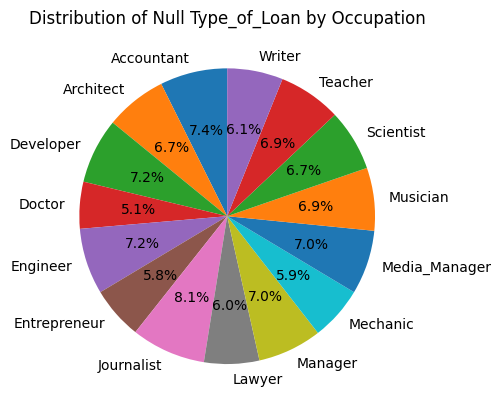

In [32]:
# Create a pie plot
num_of_type_of_loan_null.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Null Type_of_Loan by Occupation')
plt.ylabel('')  # Remove the y-axis label for better presentation
plt.show()

In [33]:
num_of_type_of_loan_null = data[data['Type_of_Loan'].isnull()].groupby("Month").size()
print(num_of_type_of_loan_null)

Month
1    1426
2    1426
3    1426
4    1426
5    1426
6    1426
7    1426
8    1426
dtype: int64


<h3>Conclusion</h3>

<p>After a thorough examination of missing values in the 'Type_of_Loan' column, it appears that these gaps are randomly distributed and not tied to any systemic factors or temporal patterns. To handle these missing values, the decision has been made to fill them with the placeholder string 'NA'. This approach is selected to maintain information about the missing values and to simplify their identification during subsequent data analysis.</p>


In [34]:
data['Type_of_Loan'].fillna('NA', inplace=True)
data["Type_of_Loan"].isnull().sum()

0

## Num_of_Delayed_Payment column

In [35]:
data[data['Num_of_Delayed_Payment'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
30,0x162c,CUS_0xb891,7,Jasond,55,72316145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,26.056395,17 Years and 9 Months,No,16.415452,71.283675,Low_spent_Large_value_payments,443.549957,Standard
32,0x1632,CUS_0x1cdb,1,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.725394,NaN,288.605522,Standard
33,0x1633,CUS_0x1cdb,2,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,Standard,943.86,27.020360,30 Years and 9 Months,NM,0.000000,74.443641,High_spent_Medium_value_payments,460.887276,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973,0x25fc7,CUS_0xf16,6,Maria Sheahanb,45,868702218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,NaN,Low_spent_Small_value_payments,NaN,Good
99974,0x25fc8,CUS_0xf16,7,Maria Sheahanb,45,868702218,Media_Manager,16680.35,1528.029167,1,...,NaN,897.16,36.166925,21 Years and 7 Months,No,41.113561,NaN,Low_spent_Small_value_payments,NaN,Good
99992,0x25fe6,CUS_0x942c,1,Nicks,24,78735990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.196481,Low_spent_Small_value_payments,NaN,Poor
99993,0x25fe7,CUS_0x942c,2,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,29.135447,31 Years and 4 Months,No,58638.000000,180.733095,Low_spent_Medium_value_payments,NaN,Standard


In [36]:
data[data['Name'] == 'Deepaa']['Num_of_Delayed_Payment']

32        NaN
33        NaN
34       12.0
35       15.0
36       17.0
37       15.0
38       15.0
39       15.0
7376     15.0
7377     15.0
7378     13.0
7379     15.0
7380     18.0
7381     15.0
7382     15.0
7383     15.0
38632    11.0
38633     7.0
38634     8.0
38635     8.0
38636     8.0
38637     8.0
38638     8.0
38639     8.0
Name: Num_of_Delayed_Payment, dtype: float64

In [37]:
data['Num_of_Delayed_Payment'] = data.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [38]:
data["Num_of_Delayed_Payment"].isnull().sum()

0

## Changed_Credit_Limit column

In [39]:
data[data['Changed_Credit_Limit'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.120,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
65,0x1663,CUS_0x4157,2,Charlie Zhur,23,70191622,Doctor,114838.410,9843.867500,2,...,Good,1377.74,27.626325,21 Years and 5 Months,NM,226.892792,212.235602,High_spent_Large_value_payments,785.258356,Good
66,0x1664,CUS_0x4157,3,Charlie Zhur,23,70191622,Doctor,114838.410,9843.867500,2,...,Good,1377.74,35.141567,21 Years and 6 Months,NM,226.892792,470.385796,High_spent_Small_value_payments,547.108162,Good
109,0x16a3,CUS_0x6c66,6,Sinead Carews,39,328336328,Manager,8701.545,519.128750,6,...,Standard,2602.69,28.570031,9 Years and 4 Months,Yes,36.548197,52.931613,Low_spent_Medium_value_payments,242.433064,Poor
110,0x16a4,CUS_0x6c66,7,Sinead Carews,39,328336328,Manager,8701.545,519.128750,6,...,Standard,2602.69,38.465415,NaN,Yes,36.548197,30.471806,Low_spent_Medium_value_payments,264.892872,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99548,0x25d4a,CUS_0x2637,5,Diane Bartzj,28,272331370,Writer,29090.500,2472.208333,5,...,NaN,1612.70,26.151395,16 Years and 2 Months,Yes,67.439731,35.401299,High_spent_Medium_value_payments,NaN,Poor
99618,0x25db4,CUS_0xae66,3,Jino,7490,721454479,Writer,142560.360,11773.030000,6,...,Standard,220.75,35.576245,17 Years and 5 Months,No,76.772094,194.787477,High_spent_Large_value_payments,NaN,Standard
99800,0x25ec6,CUS_0x1232,1,Lawderr,16,441261297,Developer,14937.490,1142.790833,8,...,Bad,3699.44,23.574545,13 Years and 2 Months,Yes,50.960878,97.586933,Low_spent_Small_value_payments,NaN,Standard
99892,0x25f4e,CUS_0x89aa,5,Kwokw,38,18637005,Manager,85744.120,7125.343333,6,...,Standard,717.79,29.513156,NaN,Yes,72.099176,88.010458,High_spent_Large_value_payments,NaN,Standard


In [40]:
data[data['Name']=='Aaron Maashoh'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,7.0,11.27,4.0,Good,809.98,31.944960,NaN
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.27,4.0,Good,809.98,23.933795,NaN


In [41]:
data['Changed_Credit_Limit'] = data.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.interpolate(method='index', limit_direction='both'))

In [42]:
data['Changed_Credit_Limit'].isnull().sum()

0

# Num_Credit_Inquiries column

In [43]:
data[data['Num_Credit_Inquiries'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,0x161c,CUS_0x2dbc,3,Langep,34,486853974,Engineer,143162.640,12187.220000,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,NaN,High_spent_Small_value_payments,715.741367,Good
47,0x1645,CUS_0x95ee,8,Np,31,612708987,Lawyer,73928.460,5988.705000,4,...,Good,548.20,31.580990,32 Years and 6 Months,No,0.000000,42.635590,NaN,796.234910,Good
113,0x16ab,CUS_0xff4,2,Poornimaf,500,655057666,Entrepreneur,25546.260,2415.855000,8,...,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.323232,Low_spent_Small_value_payments,129.933631,Standard
115,0x16ad,CUS_0xff4,4,Poornimaf,37,655057666,Entrepreneur,25546.260,2415.855000,8,...,Standard,758.44,35.946278,18 Years and 5 Months,Yes,101.328637,83.714750,High_spent_Medium_value_payments,306.542112,Standard
187,0x1719,CUS_0x5b48,4,McBrideq,32,706950150,Lawyer,12600.445,782.037083,5,...,Standard,569.80,28.819407,12 Years and 6 Months,Yes,33746.000000,31.149198,Low_spent_Medium_value_payments,300.994163,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99768,0x25e96,CUS_0xc345,1,Jeb Blountf,23,176400757,Architect,60015.320,5121.276667,7,...,Standard,1095.15,29.272858,15 Years and 2 Months,Yes,13580.000000,136.685509,High_spent_Medium_value_payments,NaN,Standard
99852,0x25f12,CUS_0x3048,5,Rick Rothackeru,40,375646913,Scientist,81093.160,7017.763333,10,...,Bad,4523.30,27.419316,9 Years and 9 Months,Yes,409.039442,741.567333,Low_spent_Small_value_payments,NaN,Standard
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.540,9963.795000,4,...,NaN,995.47,32.808662,NaN,No,237.106366,NaN,High_spent_Medium_value_payments,NaN,Good
99900,0x25f5a,CUS_0x4986,5,Charles Abbotta,33,971618388,Entrepreneur,41329.560,3421.130000,2,...,NaN,1245.01,35.367709,NaN,No,20.553577,126.576130,Low_spent_Medium_value_payments,NaN,Good


In [44]:
data[data['Name']=='Xolai'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
99872,0x25f32,CUS_0x3855,1,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",4,13.0,9.59,74.0,Good,995.47,36.238303,29 Years and 11 Months
99873,0x25f33,CUS_0x3855,2,Xolai,3891,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",2,12.0,9.59,1.0,Good,995.47,36.065495,30 Years and 0 Months
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,NaN,NaN,995.47,32.808662,NaN
99875,0x25f35,CUS_0x3855,4,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,NaN,995.47,31.108037,30 Years and 2 Months
99876,0x25f36,CUS_0x3855,5,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",1,11.0,9.59,5.0,NaN,995.47,42.272114,30 Years and 3 Months
99877,0x25f37,CUS_0x3855,6,Xolai,6476,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.5,9.59,5.0,Good,995.47,38.556181,30 Years and 4 Months
99878,0x25f38,CUS_0x3855,7,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,12.0,9.59,5.0,Good,995.47,36.246273,30 Years and 5 Months
99879,0x25f39,CUS_0x3855,8,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,39.747228,30 Years and 6 Months


In [45]:
data[data['Num_Credit_Inquiries'] > 15]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
173,0x1703,CUS_0xa16e,6,Lee Chyenz,42,905507912,Media_Manager,10183.015,1074.584583,7,...,Bad,1672.43,25.105403,10 Years and 6 Months,Yes,37.588073,73.899861,Low_spent_Small_value_payments,285.970524,Poor
193,0x1723,CUS_0xa5f9,2,Rickt,34,189095267,Mechanic,57983.120,4720.926667,9,...,Bad,3532.83,37.873642,12 Years and 3 Months,Yes,200.432613,193.873375,High_spent_Medium_value_payments,327.786678,Standard
194,0x1724,CUS_0xa5f9,3,Rickt,34,189095267,Mechanic,57983.120,4720.926667,9,...,Bad,3532.83,37.810243,12 Years and 4 Months,Yes,200.432613,534.358178,Low_spent_Small_value_payments,27.301875,Poor
195,0x1725,CUS_0xa5f9,4,Rickt,34,189095267,Mechanic,57983.120,4720.926667,9,...,NaN,3532.83,32.567397,12 Years and 5 Months,Yes,200.432613,197.640496,High_spent_Medium_value_payments,324.019558,Poor
196,0x1726,CUS_0xa5f9,5,Rickt,34,189095267,Mechanic,57983.120,4720.926667,9,...,Bad,3532.83,37.284290,12 Years and 6 Months,Yes,200.432613,205.250152,Low_spent_Small_value_payments,356.409901,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99743,0x25e6d,CUS_0x9674,8,Damounit,23,949103104,Scientist,18940.820,1281.401667,9,...,Bad,1327.42,36.038114,15 Years and 11 Months,Yes,87.857445,44.626674,High_spent_Small_value_payments,NaN,Poor
99769,0x25e97,CUS_0xc345,2,Jeb Blountf,23,176400757,Architect,60015.320,5121.276667,7,...,NaN,1095.15,35.864367,15 Years and 3 Months,Yes,187.008683,241.313632,Low_spent_Large_value_payments,NaN,Standard
99789,0x25eb3,CUS_0x62f5,6,Alexein,54,272402510,Musician,99520.500,8479.375000,3,...,NaN,547.21,32.224773,16 Years and 6 Months,No,196.528591,NaN,High_spent_Large_value_payments,NaN,Good
99800,0x25ec6,CUS_0x1232,1,Lawderr,16,441261297,Developer,14937.490,1142.790833,8,...,Bad,3699.44,23.574545,13 Years and 2 Months,Yes,50.960878,97.586933,Low_spent_Small_value_payments,NaN,Standard


In [46]:
customer_ids = data[(data['Num_Credit_Inquiries'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Num_Credit_Inquiries'] = data.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [47]:
# Identify customers with more than 15 credit inquiries
filtered_data = data[data['Num_Credit_Inquiries'] > 15]

# Calculate the mode for each customer
mode_by_customer = filtered_data.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.mode().iloc[0])

# Update the values in the original DataFrame
data.loc[data['Num_Credit_Inquiries'] > 15, 'Num_Credit_Inquiries'] = mode_by_customer

In [48]:
data['Num_Credit_Inquiries'].isnull().sum()

0

## Credit_Mix column

In [49]:
data[data['Credit_Mix'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
10,0x1610,CUS_0x21b1,3,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,NaN,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
19,0x161d,CUS_0x2dbc,4,Langep,34,486853974,Engineer,143162.64,12187.220000,1,...,NaN,1303.01,39.501648,NaN,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.513411,Good
29,0x162b,CUS_0xb891,6,Jasond,55,72316145,Entrepreneur,30689.89,2612.490833,2,...,NaN,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
35,0x1635,CUS_0x1cdb,4,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,NaN,943.86,28.924954,30 Years and 11 Months,Yes,0.000000,96.785485,High_spent_Medium_value_payments,438.545432,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,0x25fde,CUS_0x8600,5,Sarah McBridec,28,31350942,Architect,20002.88,1929.906667,10,...,NaN,3571.70,28.508250,6 Years and 0 Months,Yes,60.964772,213.978010,Low_spent_Small_value_payments,NaN,Standard
99992,0x25fe6,CUS_0x942c,1,Nicks,24,78735990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.196481,Low_spent_Small_value_payments,NaN,Poor
99994,0x25fe8,CUS_0x942c,3,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,Poor
99995,0x25fe9,CUS_0x942c,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor


In [50]:
# Create a dictionary to map Customer_ID to non-null Credit_Mix values
Credit_Mix_mapping = data.dropna(subset=['Credit_Mix']).set_index('Customer_ID')['Credit_Mix'].to_dict()

# Fill missing Credit_Mix values based on Customer_ID
data['Credit_Mix'] = data.apply(lambda row: Credit_Mix_mapping.get(row['Customer_ID'], row['Credit_Mix']), axis=1)

In [51]:
data["Credit_Mix"].isnull().sum()

0

## Credit_History_Age column

In [52]:
data[data['Credit_History_Age'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
19,0x161d,CUS_0x2dbc,4,Langep,34,486853974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,39.501648,NaN,No,246.992319,825.216270,Low_spent_Medium_value_payments,426.513411,Good
40,0x163e,CUS_0x95ee,1,Np,31,612708987,Lawyer,73928.46,5988.705000,4,...,Good,548.20,39.962685,NaN,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good
42,0x1640,CUS_0x95ee,3,Np,31,612708987,Lawyer,73928.46,5988.705000,4,...,Good,548.20,40.712187,NaN,No,0.000000,150.059734,High_spent_Medium_value_payments,698.810766,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,0x25f9e,CUS_0x51b3,1,Ryana,33,837859800,Media_Manager,59146.36,4908.863333,2,...,Good,418.03,34.720661,NaN,No,26.778419,606.436542,Low_spent_Small_value_payments,NaN,Standard
99963,0x25fb9,CUS_0x372c,4,Lucia Mutikanik,500,340857301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.193919,High_spent_Large_value_payments,NaN,Standard
99968,0x25fc2,CUS_0xf16,1,Maria Sheahanb,44,868702218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,39.868572,NaN,NM,41.113561,52.951978,High_spent_Small_value_payments,NaN,Good
99975,0x25fc9,CUS_0xf16,8,Maria Sheahanb,45,868702218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,41.212367,NaN,No,41.113561,70.805550,Low_spent_Large_value_payments,NaN,Good


In [53]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x

In [54]:
data.Credit_History_Age = data.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(np.float64)

In [55]:
customer_ids = data[(data['Credit_History_Age'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Credit_History_Age'] = data.groupby('Customer_ID')['Credit_History_Age'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [56]:
data['Credit_History_Age'].isnull().sum()

0

## Amount_Invested_Monthly column

In [57]:
data[data['Amount_invested_monthly'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,0x161c,CUS_0x2dbc,3,Langep,34,486853974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,26.519815,215.0,No,246.992319,NaN,High_spent_Small_value_payments,715.741367,Good
23,0x1621,CUS_0x2dbc,8,Langep,34,486853974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,38.374753,220.0,No,246.992319,NaN,High_spent_Small_value_payments,895.494583,Standard
28,0x162a,CUS_0xb891,5,Jasond,55,72316145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,41.154317,211.0,No,16.415452,NaN,Low_spent_Large_value_payments,359.374916,Standard
60,0x165a,CUS_0x5407,5,Annk,30,500926408,Media_Manager,34081.38,2611.115000,8,...,Standard,1704.18,30.206214,179.0,Yes,70.478333,NaN,High_spent_Large_value_payments,397.228355,Standard
61,0x165b,CUS_0x5407,6,Annk,30,500926408,Media_Manager,34081.38,2611.115000,8,...,Standard,1704.18,31.170872,180.0,Yes,70.478333,NaN,NaN,410.674366,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99925,0x25f7f,CUS_0x2654,6,enj,38,647678889,Media_Manager,139664.96,11777.746667,3,...,Standard,365.66,27.714375,360.0,Yes,423.731016,NaN,Low_spent_Large_value_payments,NaN,Standard
99951,0x25fa5,CUS_0x51b3,8,Ryana,33,837859800,Media_Manager,59146.36,4908.863333,3,...,Good,418.03,27.682186,248.0,No,26.778419,NaN,Low_spent_Large_value_payments,NaN,Standard
99961,0x25fb7,CUS_0x372c,2,Lucia Mutikanik,18,340857301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,33.494867,338.0,No,34.975457,NaN,High_spent_Medium_value_payments,NaN,Good
99973,0x25fc7,CUS_0xf16,6,Maria Sheahanb,45,868702218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,24.972853,258.0,No,41.113561,NaN,Low_spent_Small_value_payments,NaN,Good


In [58]:
customer_ids = data[(data['Amount_invested_monthly'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Amount_invested_monthly'] = data.groupby('Customer_ID')['Amount_invested_monthly'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [59]:
data['Amount_invested_monthly'].isnull().sum()

0

## Payment_Behaviour column

In [60]:
data[data['Payment_Behaviour'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,27.262259,270.0,No,49.574949,62.430172,NaN,340.479212,Good
16,0x161a,CUS_0x2dbc,1,Langep,34,486853974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,28.616735,213.0,No,246.992319,168.413703,NaN,1043.315978,Good
32,0x1632,CUS_0x1cdb,1,Deepaa,21,615067821,Developer,35547.71,2853.309167,7,...,Standard,943.86,39.797764,368.0,Yes,0.000000,276.725394,NaN,288.605522,Standard
47,0x1645,CUS_0x95ee,8,Np,31,612708987,Lawyer,73928.46,5988.705000,4,...,Good,548.20,31.580990,390.0,No,0.000000,42.635590,NaN,796.234910,Good
54,0x1650,CUS_0x284a,7,Nadiaq,34,411510676,Lawyer,10909427.00,10469.207759,0,...,Good,352.16,26.947565,373.0,No,911.220179,930.391898,NaN,326.241830,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,0x25fa1,CUS_0x51b3,4,Ryana,33,837859800,Media_Manager,59146.36,4908.863333,2,...,Good,418.03,28.091458,244.0,No,26.778419,183.584149,NaN,NaN,Standard
99980,0x25fd2,CUS_0xaf61,5,Chris Wickhamm,49,133167738,Writer,37188.10,3097.008333,1,...,Good,620.64,27.495263,361.0,No,84.205949,78.497727,NaN,NaN,Standard
99982,0x25fd4,CUS_0xaf61,7,Chris Wickhamm,50,133167738,Writer,37188.10,3097.008333,1,...,Good,620.64,38.850680,363.0,No,84.205949,82.825572,NaN,NaN,Good
99989,0x25fdf,CUS_0x8600,6,Sarah McBridec,28,31350942,Architect,20002.88,1929.906667,10,...,Bad,3571.70,33.359987,73.0,Yes,60.964772,74.366603,NaN,NaN,Standard


In [61]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [62]:
# Define a custom function to calculate mode with handling for NaN values
def custom_mode(series):
    return series.dropna().mode().iloc[0] if not series.dropna().empty else np.nan

# Calculate and fill missing values with the mode payment behavior for each customer
data['Payment_Behaviour'] = data['Payment_Behaviour'].fillna(data.groupby('Customer_ID')['Payment_Behaviour'].transform(custom_mode))

In [63]:
data['Payment_Behaviour'].isnull().sum()

0

## Monthly_Balance column

In [64]:
data[data['Monthly_Balance'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
197,0x1727,CUS_0xa5f9,6,Rickt,34,189095267,Mechanic,57983.12,4720.926667,9,...,Bad,3532.83,35.257378,151.0,Yes,200.432613,626.869242,Low_spent_Small_value_payments,NaN,Standard
314,0x17d8,CUS_0x571f,3,Emily Flitterl,18,397289675,Developer,66567.32,5800.276667,5,...,Standard,233.79,33.486848,293.0,No,100.189361,770.696413,Low_spent_Small_value_payments,NaN,Standard
388,0x1846,CUS_0x9b3c,5,Scheydere,43,224487837,Lawyer,81842.28,6810.190000,10,...,Bad,3053.16,31.317433,8.0,Yes,574.065798,447.848578,Low_spent_Medium_value_payments,NaN,Standard
456,0x18ae,CUS_0x9d78,1,Tim Hepherp,20,423776457,Scientist,69977.60,5978.466667,10,...,Bad,3042.36,37.217199,152.0,Yes,485.750431,405.149364,Low_spent_Small_value_payments,NaN,Standard
457,0x18af,CUS_0x9d78,2,Tim Hepherp,20,423776457,Scientist,69977.60,5978.466667,10,...,Bad,3042.36,30.467836,153.0,Yes,485.750431,470.837204,Low_spent_Large_value_payments,NaN,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


In [65]:
data[data["Customer_ID"] == 'CUS_0x942c']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99992,0x25fe6,CUS_0x942c,1,Nicks,24,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,32.991333,375.0,No,35.104023,401.196481,Low_spent_Small_value_payments,NaN,Poor
99993,0x25fe7,CUS_0x942c,2,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,29.135447,376.0,No,58638.000000,180.733095,Low_spent_Medium_value_payments,NaN,Standard
99994,0x25fe8,CUS_0x942c,3,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,39.323569,377.0,No,35.104023,140.581403,High_spent_Medium_value_payments,NaN,Poor
99995,0x25fe9,CUS_0x942c,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard
99999,0x25fed,CUS_0x942c,8,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.192463,382.0,No,35.104023,167.163865,High_spent_Large_value_payments,NaN,Poor


In [66]:
customer_ids = data[(data['Monthly_Balance'].isna())]['Customer_ID'].values

# Group by 'Customer_ID' and perform index interpolation
data['Monthly_Balance'] = data.groupby('Customer_ID')['Monthly_Balance'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [67]:
data[data['Monthly_Balance'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
98304,0x25602,CUS_0xb3d7,1,Greg Roumeliotisw,19,901771325,Teacher,16809.56,1686.796667,7,...,Bad,1790.93,29.600846,69.0,Yes,38.650760,97.549516,Low_spent_Small_value_payments,NaN,Poor
98305,0x25603,CUS_0xb3d7,2,Greg Roumeliotisw,19,901771325,Teacher,16809.56,1686.796667,7,...,Bad,1790.93,22.649438,70.0,Yes,38.650760,96.660087,Low_spent_Large_value_payments,NaN,Poor
98306,0x25604,CUS_0xb3d7,3,Greg Roumeliotisw,19,901771325,Teacher,16809.56,1686.796667,7,...,Bad,1790.93,30.443484,71.0,Yes,38.650760,80.162639,Low_spent_Small_value_payments,NaN,Poor
98307,0x25605,CUS_0xb3d7,4,Greg Roumeliotisw,19,901771325,Teacher,8810368.00,1686.796667,7,...,Bad,1790.93,34.752306,72.0,Yes,38.650760,63.665192,High_spent_Small_value_payments,NaN,Standard
98308,0x25606,CUS_0xb3d7,5,Greg Roumeliotisw,19,901771325,Teacher,16809.56,1686.796667,7,...,Bad,1790.93,28.533922,73.0,Yes,38.650760,143.469938,Low_spent_Large_value_payments,NaN,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


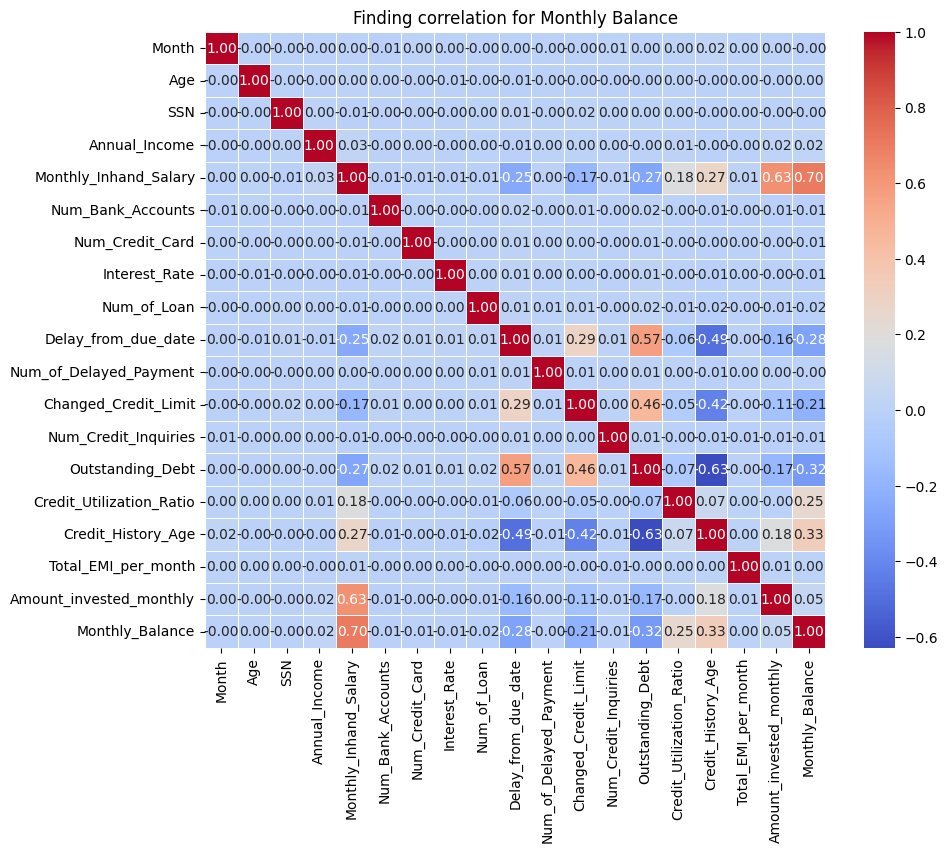

In [68]:
selected_columns = data.select_dtypes(include=['number'])
correlation_matrix = selected_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Finding correlation for Monthly Balance')
plt.show()

In [69]:
imputer = SimpleImputer(strategy='most_frequent')  

data['Monthly_Balance'] = imputer.fit_transform(data[['Monthly_Balance']])

In [70]:
customer_mode_payment = data.groupby('Monthly_Inhand_Salary')['Monthly_Balance'].transform(custom_mode)

# Fill missing values with the corresponding customer's mode payment behavior
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(customer_mode_payment)

In [71]:
data['Monthly_Balance'].isnull().sum()

0

## Final check

In [72]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [73]:
display(data)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,270.099963,Poor
99996,0x25fea,CUS_0x942c,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,270.099963,Poor
99997,0x25feb,CUS_0x942c,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,270.099963,Poor
99998,0x25fec,CUS_0x942c,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,270.099963,Standard


In [74]:
data.to_csv('../data/processed/preprocessed_data.csv', index=False)